In [1]:
# importing the needed libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy .stats as stats
%matplotlib inline
sns.set()
import math
from scipy import stats
from scipy.stats import zscore
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from matplotlib.patches import Rectangle

Problem 2:

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [2]:
# importing the data
Education = pd.read_csv('C:\\Users\\91861\\Documents\\Statistics\\PCA\Project\\Education+-+Post+12th+Standard.csv')

In [3]:
# copying the data
df = Education.copy()

In [4]:
# Data description

In [5]:
df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [6]:
df.shape
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])

No of Rows: 777
No of Columns: 18


In [7]:
# identifying the data types
df.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [8]:
df.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

In [9]:
# Graduation rate is more than 100. 
df[df['Grad.Rate'] >100]

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
95  Cazenovia College  3847    3433     527          9         35   

    F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
95         1010           12      9384        4840    600       500   22   

    Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
95        47       14.3           20    7697        118

In [10]:
# One particular college has graduation rate more than 100%. 
# It is an anamoly in the data.
# imputing 100% instead of 118

In [11]:
# checking for duplicates
duplicate = df.duplicated()

In [12]:
print('No of duplicates:', duplicate.sum())

No of duplicates: 0


In [13]:
# checking for null values:
df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

**2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?**

In [14]:
# Univariate analysis:
# Histogram and boxplot

In [79]:
# renaming the columns
df.columns = ['Univ/College','Received_Applications','Accepted_Applications','Students_Enrolled','Students_Top10','Students_Top25',
             'Full_time','Part_time','Out_of_State_Stud','Cost_Room','Cost_Books','Personal_Exp','Faculty_Phd','Faculty_Terminal',
             'SF_Ratio','Perc_alumni_donation','Instruct_Exp','Grad_Rate']

In [81]:
# replacing the value with 100%
df['Grad_Rate'].replace(to_replace=118,value=100,inplace=True)

In [157]:
# post treatment description about the graduation rate
df['Grad_Rate'].describe()

count    777.000000
mean      65.440154
std       17.118804
min       10.000000
25%       53.000000
50%       65.000000
75%       78.000000
max      100.000000
Name: Grad_Rate, dtype: float64

In [110]:
df_num = df.select_dtypes(['int64','float64'])

In [83]:
# as we are not treating the outliers it is wise to compare data based on their Median and not with Mean
df_num.median()

Received_Applications    1558.0
Accepted_Applications    1110.0
Students_Enrolled         434.0
Students_Top10             23.0
Students_Top25             54.0
Full_time                1707.0
Part_time                 353.0
Out_of_State_Stud        9990.0
Cost_Room                4200.0
Cost_Books                500.0
Personal_Exp             1200.0
Faculty_Phd                75.0
Faculty_Terminal           82.0
SF_Ratio                   13.6
Perc_alumni_donation       21.0
Instruct_Exp             8377.0
Grad_Rate                  65.0
dtype: float64

In [84]:
df_cat = df.select_dtypes('object')

In [85]:
list_numeric_columns = list(df_num.columns.values)

In [86]:
def UnivariateAnalysis_Numeric(column,bins):
    print(" ")
    print("Description of " +column, "column")
    print("--------------------------------------------------------")
    print(df_num[column].describe(),end='')
    
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1).
    print(" ")
    print(" ")
    print("Histogram and Boxplot for the " +column,"column")
    print("---------------------------------------------------------")
    sns.histplot(df_num[column],kde=False,color='k')
    plt.subplot(1,2,2)
    sns.boxplot(x=df_num[column],color='r',saturation=2,whis=2,linewidth=2)
    plt.show()

 
Description of Received_Applications column
--------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Received_Applications, dtype: float64 
 
Histogram and Boxplot for the Received_Applications column
---------------------------------------------------------


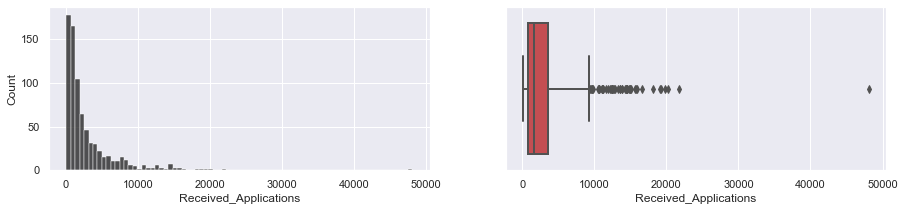

 
Description of Accepted_Applications column
--------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accepted_Applications, dtype: float64 
 
Histogram and Boxplot for the Accepted_Applications column
---------------------------------------------------------


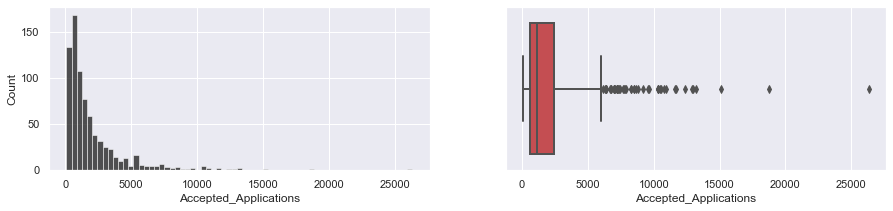

 
Description of Students_Enrolled column
--------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Students_Enrolled, dtype: float64 
 
Histogram and Boxplot for the Students_Enrolled column
---------------------------------------------------------


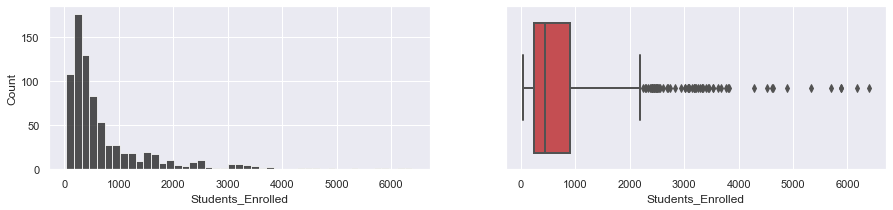

 
Description of Students_Top10 column
--------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Students_Top10, dtype: float64 
 
Histogram and Boxplot for the Students_Top10 column
---------------------------------------------------------


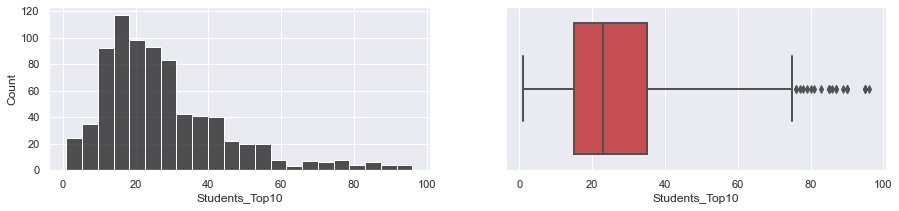

 
Description of Students_Top25 column
--------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Students_Top25, dtype: float64 
 
Histogram and Boxplot for the Students_Top25 column
---------------------------------------------------------


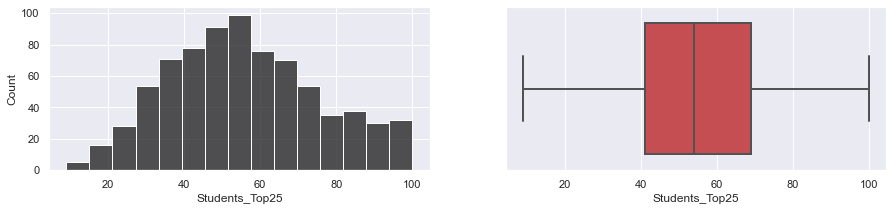

 
Description of Full_time column
--------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: Full_time, dtype: float64 
 
Histogram and Boxplot for the Full_time column
---------------------------------------------------------


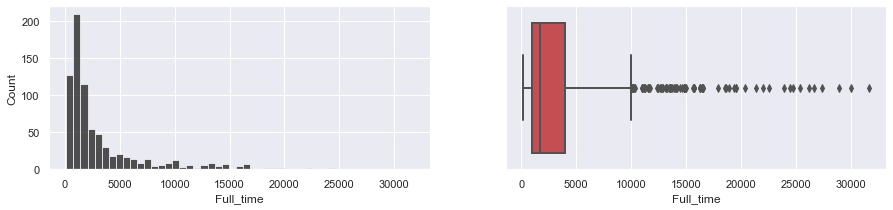

 
Description of Part_time column
--------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: Part_time, dtype: float64 
 
Histogram and Boxplot for the Part_time column
---------------------------------------------------------


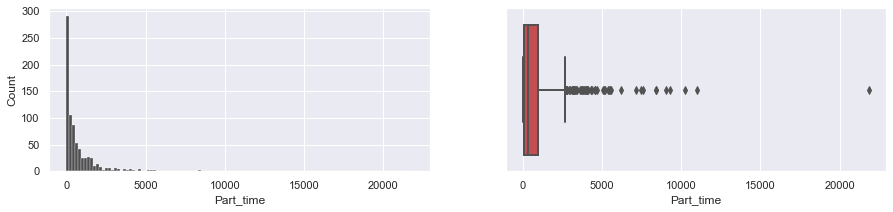

 
Description of Out_of_State_Stud column
--------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Out_of_State_Stud, dtype: float64 
 
Histogram and Boxplot for the Out_of_State_Stud column
---------------------------------------------------------


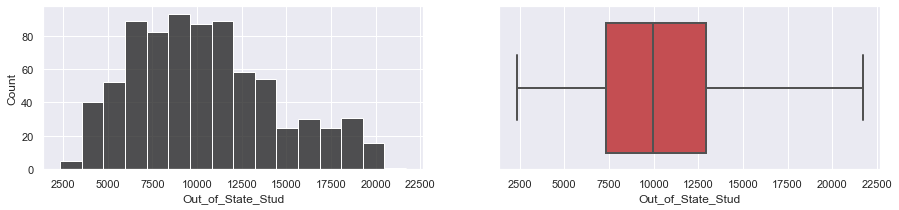

 
Description of Cost_Room column
--------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Cost_Room, dtype: float64 
 
Histogram and Boxplot for the Cost_Room column
---------------------------------------------------------


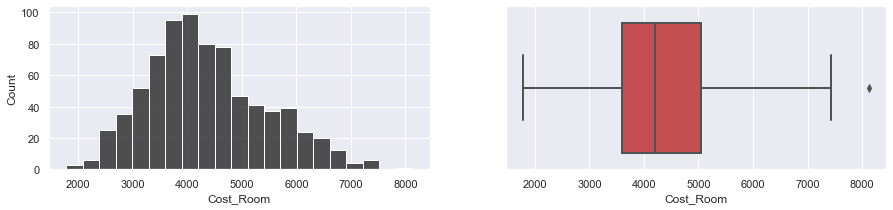

 
Description of Cost_Books column
--------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Cost_Books, dtype: float64 
 
Histogram and Boxplot for the Cost_Books column
---------------------------------------------------------


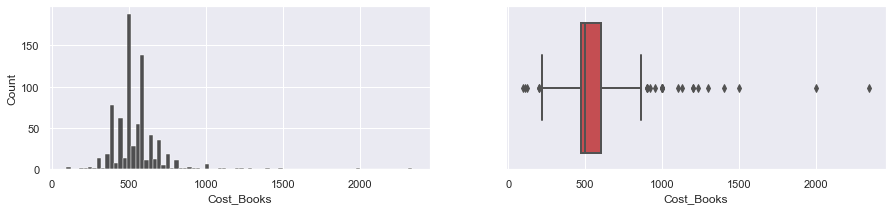

 
Description of Personal_Exp column
--------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal_Exp, dtype: float64 
 
Histogram and Boxplot for the Personal_Exp column
---------------------------------------------------------


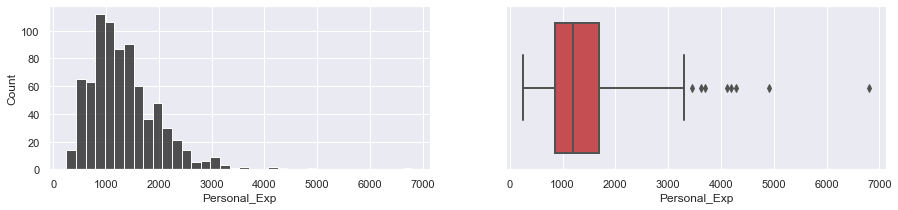

 
Description of Faculty_Phd column
--------------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: Faculty_Phd, dtype: float64 
 
Histogram and Boxplot for the Faculty_Phd column
---------------------------------------------------------


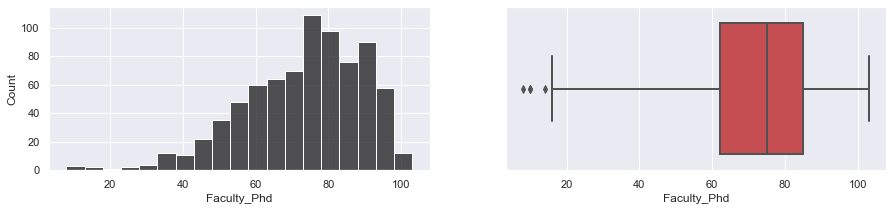

 
Description of Faculty_Terminal column
--------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Faculty_Terminal, dtype: float64 
 
Histogram and Boxplot for the Faculty_Terminal column
---------------------------------------------------------


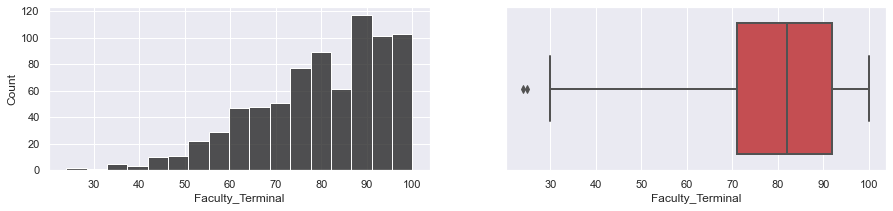

 
Description of SF_Ratio column
--------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: SF_Ratio, dtype: float64 
 
Histogram and Boxplot for the SF_Ratio column
---------------------------------------------------------


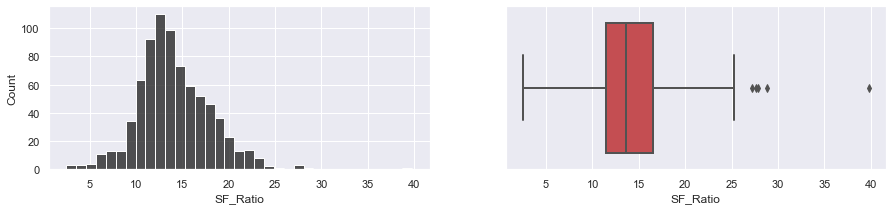

 
Description of Perc_alumni_donation column
--------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: Perc_alumni_donation, dtype: float64 
 
Histogram and Boxplot for the Perc_alumni_donation column
---------------------------------------------------------


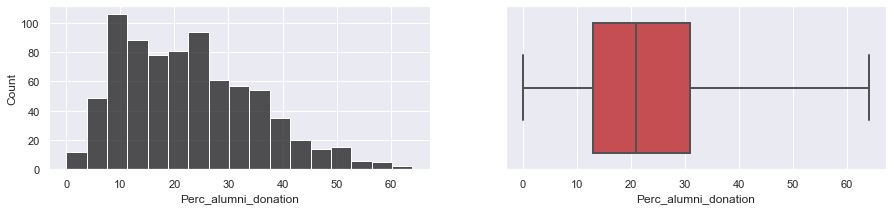

 
Description of Instruct_Exp column
--------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Instruct_Exp, dtype: float64 
 
Histogram and Boxplot for the Instruct_Exp column
---------------------------------------------------------


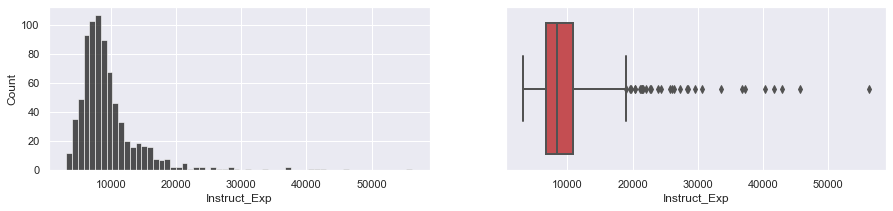

 
Description of Grad_Rate column
--------------------------------------------------------
count    777.000000
mean      65.440154
std       17.118804
min       10.000000
25%       53.000000
50%       65.000000
75%       78.000000
max      100.000000
Name: Grad_Rate, dtype: float64 
 
Histogram and Boxplot for the Grad_Rate column
---------------------------------------------------------


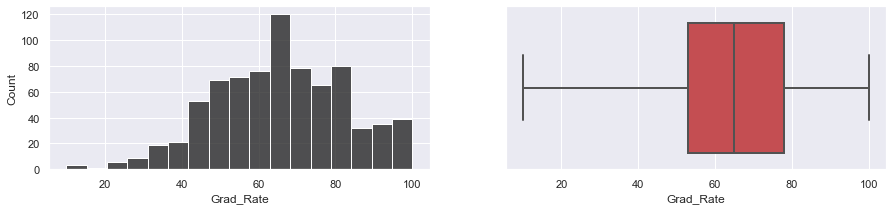

In [87]:
for x in list_numeric_columns:
    UnivariateAnalysis_Numeric(x,20)

##### Insights from Univariate Analysis:
1. On an average 67% of applications are accepted by the University/College
2. Out of 67% accepted applications only an average of 25% students are enrolled.
3. Column Student_Top25 is almost normally distributed and has no outliers.
4. Students prefer Full-time graduation than Part-time.
5. Cost of Room range from 1780 to 8120. There is an adequate choice of selection of room with respect to cost.
6. Almost 50% of the cost of books amounts to 500. Only 25% of the books are more than 600.
7. Almost 75% of students spend less than 1200 for personal expenses. (Based on the Median)
8. On an average 72% of Faculties have PhD and 79% have Terminal degrees
9. A good student to Faculty ratio would be 18 students per faculty. Out data set shows an average of 14 students per faculty, which is low. Only 25% of the colleges have the ideal ratio.
10. Only 25% of colleges have an instructional expenditure above 8300 approximately. (based on Median)
11. The low the graduation rate, the quality of the institution is at stake. 75% of the institutions have only 78% as graduation rate. 

In [88]:
# Bivariate analysis:
correlation = df_num.corr()

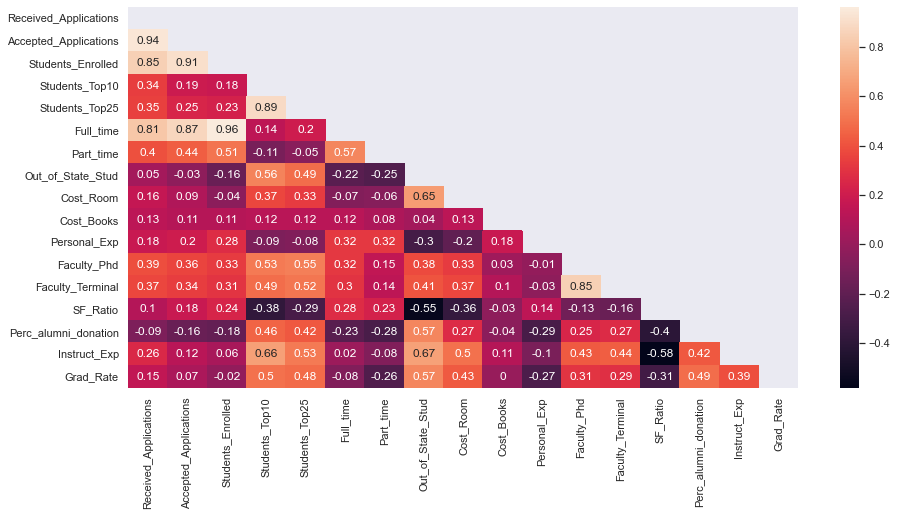

In [89]:
plt.subplots(figsize=(15,7))
mask = np.triu(np.ones_like(correlation,dtype=np.bool))
sns.heatmap(round(correlation,2),annot=True,mask = mask)
plt.show()

##### Insights from Heatmap:

1. Instruction expenditure includes expenditure for teachers sarlaries and benefits for teachers. Instructional expenditure and SF Ratio shows a strong negative correlation. Which means, increase in expenditure does not increase the student faculty ratio.
2. Graduation rate and SF Ratio show strong negative correlation. An increase in SF ratio alone does not boost the graduation rate.
3. Graduation rate and Number of Part time students shows a negative correlation. No evidence to prove that graduation rate is less for part time students.
4. Graduation rate, Faculty PhD, Faculty Terminal, Cost of room and Instructional expenditure shows positive correlation. When more Faculties hold PhD and terminal degrees the graduation rate tends to be high.
5. Students enrolled and full time is strongly correlated. Students highly prefer full time course.
6. Cost of room and students enrolled is negatively correlated. Higher the cost of room lower the students enrolled for both Full-time and part-time.
7. Students from Top 10 and 25 Higher secondary class look for more number of faculties with PhD and Terminal degree and does not consider SF ratio as a key element for selection of any institution.
8. SF Ratio and Faculty Phd and Terminal degree are negatively correlated. A faculty with Phd or Terminal degree can handle more number of students irrespective of the SF Ratio. 
9. Students from Top 10 and 25 higher secondary class has high graduation rate.
10. When percentage of alumni donation is high the cost of books are less. They are negatively correlated.
11. Percentage of Alumni donation is very much correlated with Top10 and 25 students, faculties and Graduation rate.

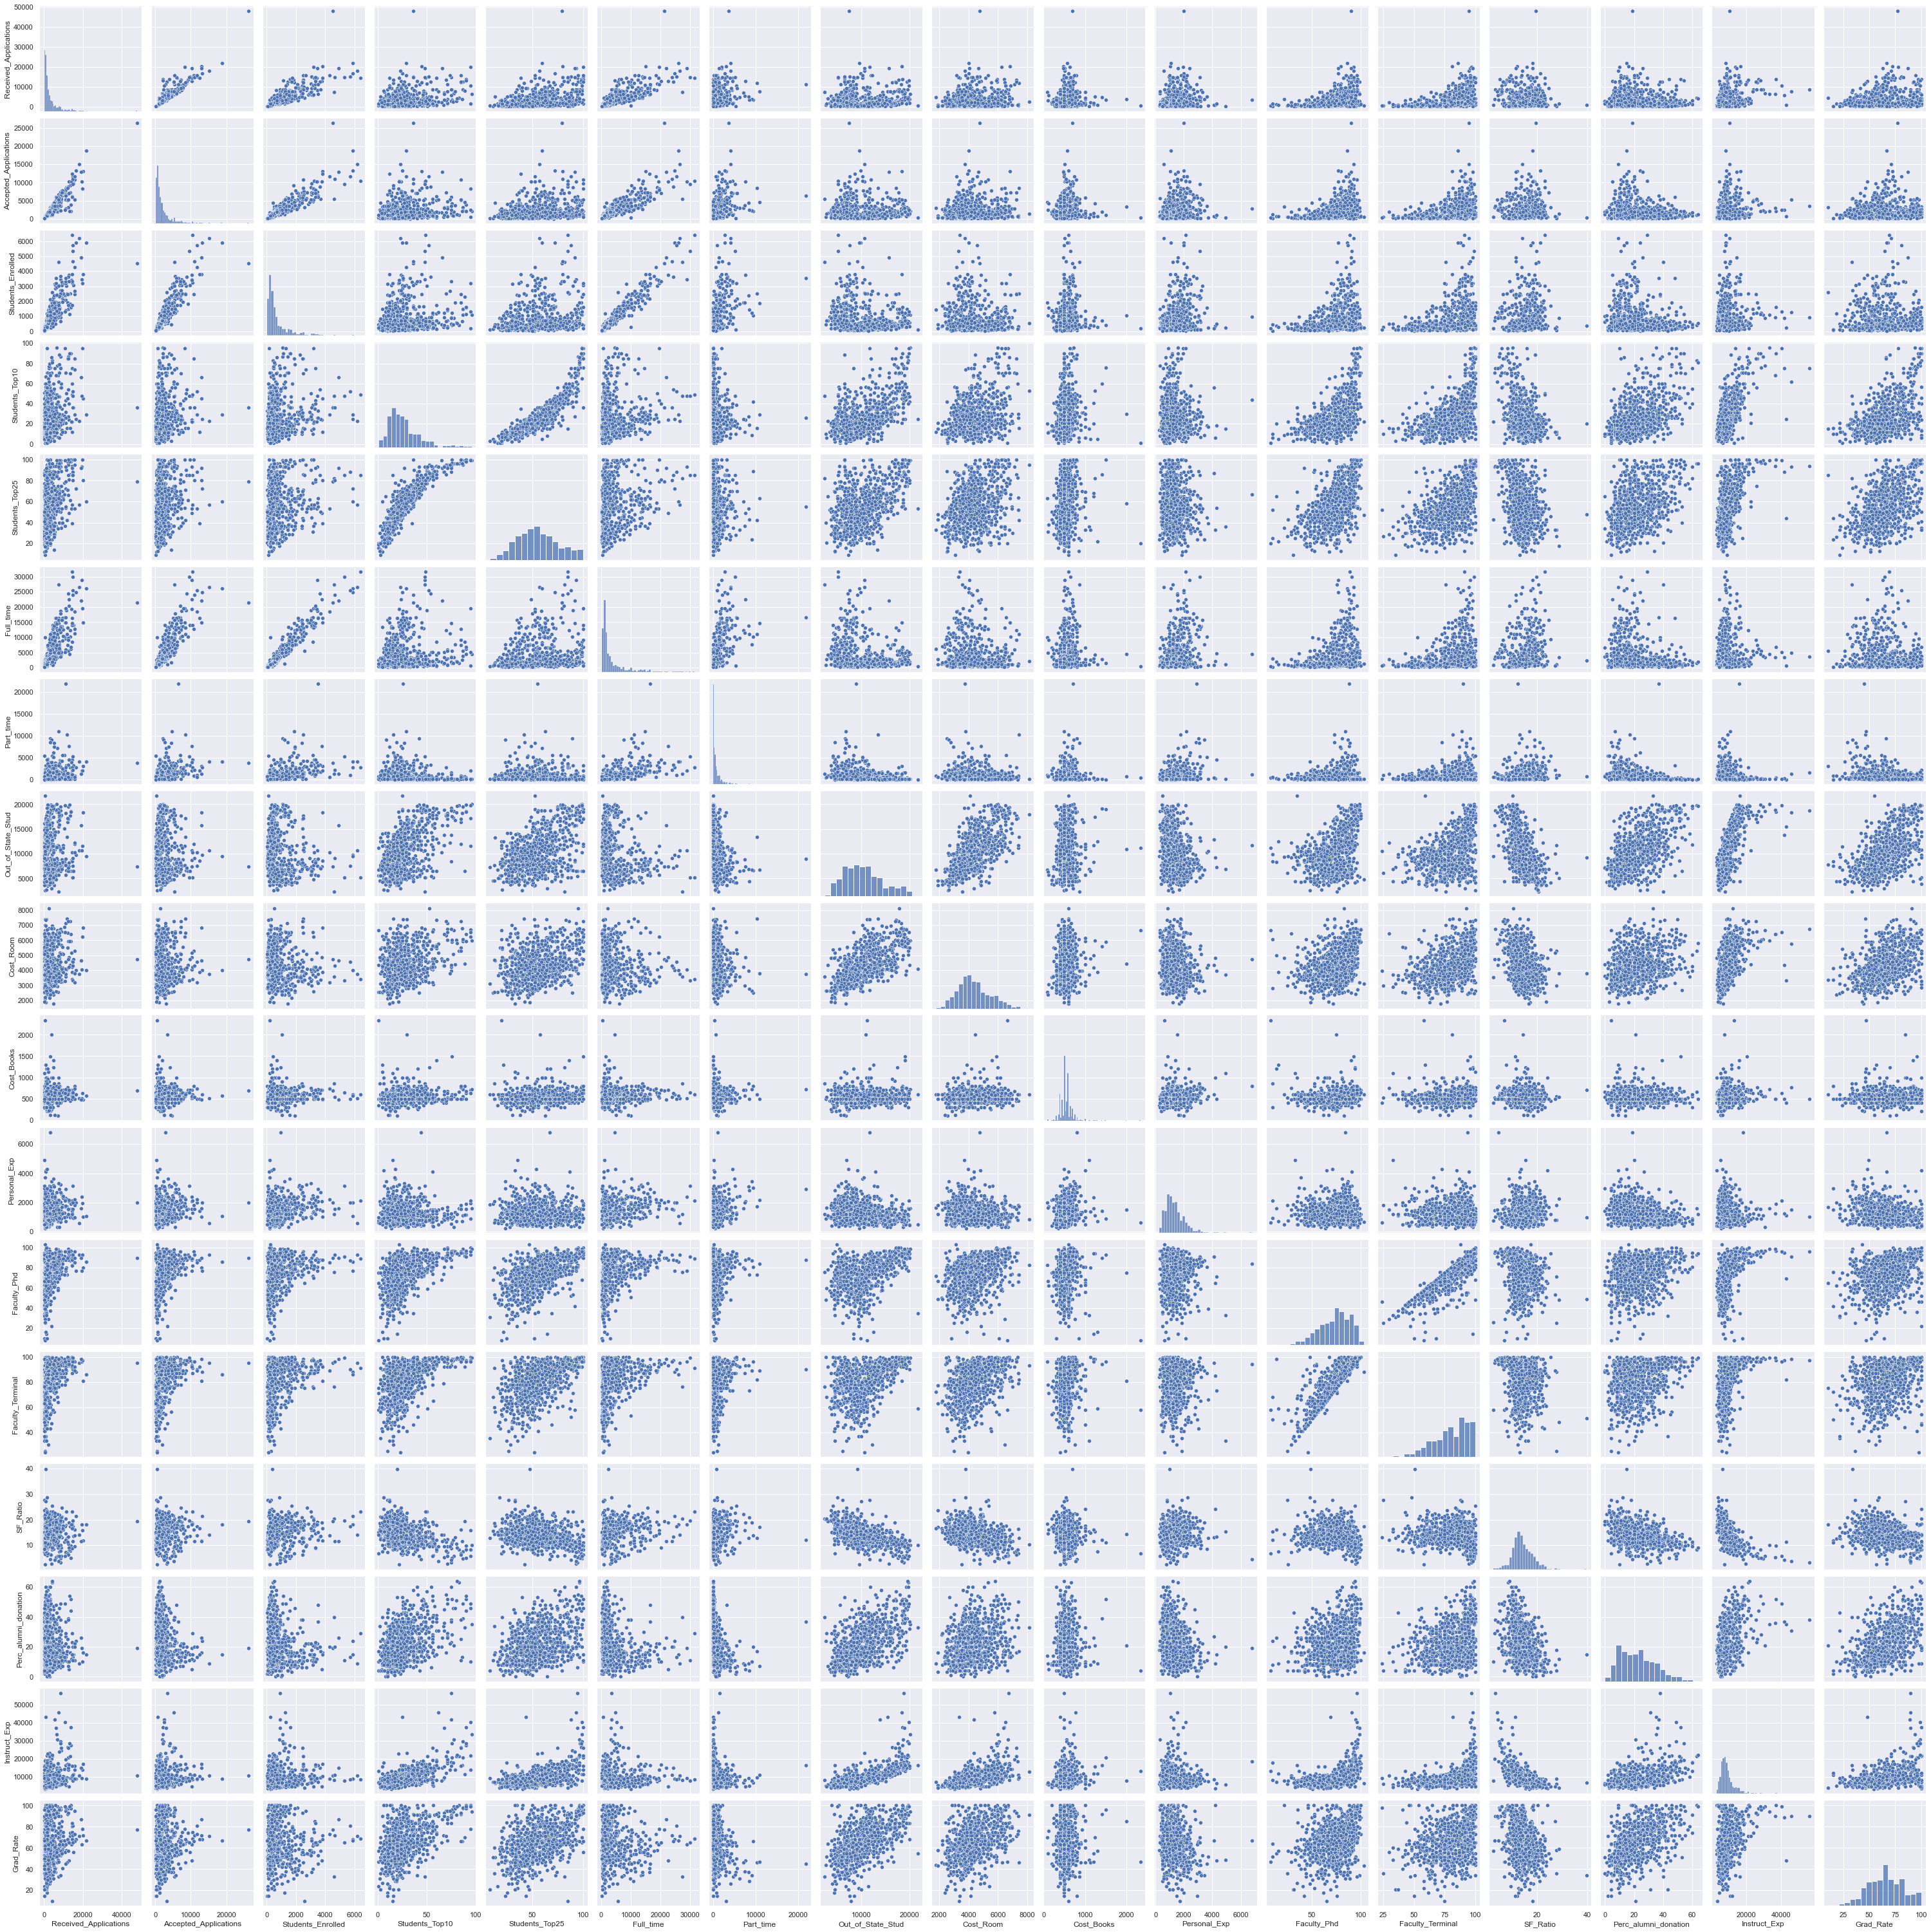

In [90]:
# pairplot for the numeric columns:
sns.pairplot(df_num)
plt.show()

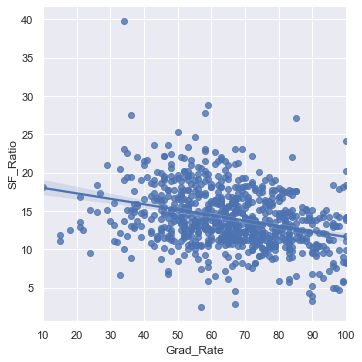

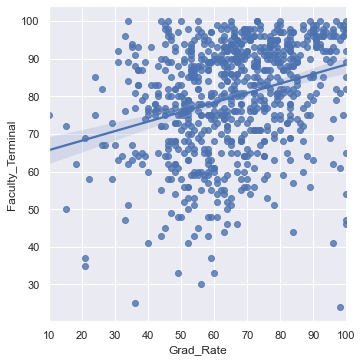

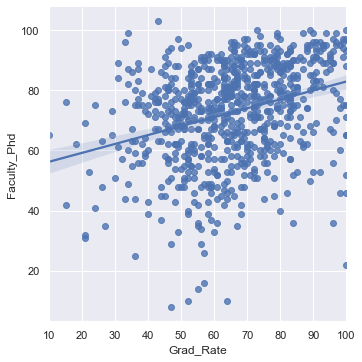

In [91]:
# lm plot for SF Ratio, Faculty Phd and Terminal degree with Graduation rate
sns.lmplot(y='SF_Ratio',x='Grad_Rate',data=df_num)
sns.lmplot(y='Faculty_Terminal',x='Grad_Rate',data=df_num)
sns.lmplot(y='Faculty_Phd',x='Grad_Rate',data=df_num)

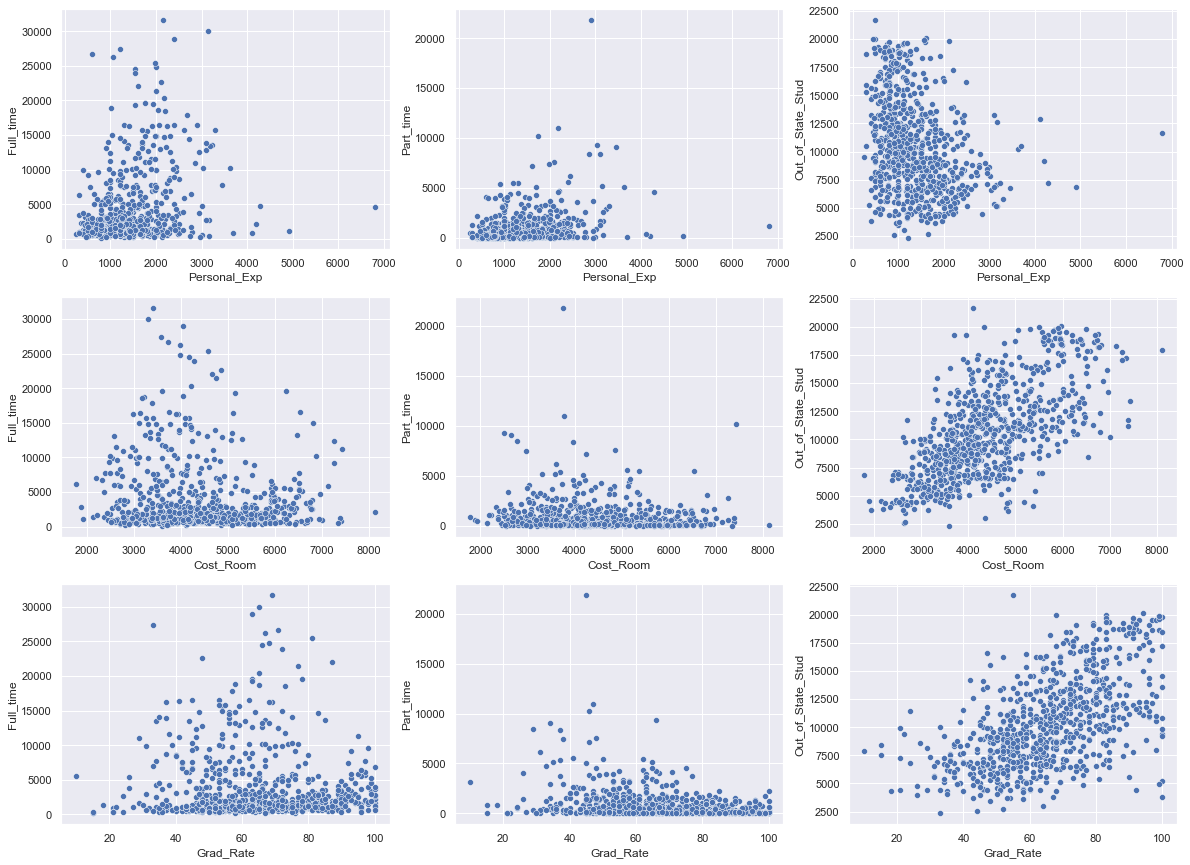

In [92]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.scatterplot(y='Full_time',x='Personal_Exp',data=df_num)
plt.subplot(3,3,2)
sns.scatterplot(y='Part_time',x='Personal_Exp',data=df_num)
plt.subplot(3,3,3)
sns.scatterplot(y='Out_of_State_Stud',x='Personal_Exp',data=df_num)
plt.subplot(3,3,4)
sns.scatterplot(y='Full_time',x='Cost_Room',data=df_num)
plt.subplot(3,3,5)
sns.scatterplot(y='Part_time',x='Cost_Room',data=df_num)
plt.subplot(3,3,6)
sns.scatterplot(y='Out_of_State_Stud',x='Cost_Room',data=df_num)
plt.subplot(3,3,7)
sns.scatterplot(y='Full_time',x='Grad_Rate',data=df_num)
plt.subplot(3,3,8)
sns.scatterplot(y='Part_time',x='Grad_Rate',data=df_num)
plt.subplot(3,3,9)
sns.scatterplot(y='Out_of_State_Stud',x='Grad_Rate',data=df_num)
plt.show()

**2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.
2**

##### Need for Scaling:
1. When dealing with data that has features with different scales, it's often important to scale the data first. 
2. It helps handling disparities in units
3. In the given data set we have different scales like, Percentages, Ratio, Count and Cost
4. We are using the Z-score scaling technique

In [93]:
# importing zscore from scipy library
from scipy.stats import zscore

In [96]:
# Scaling the data using zscore
scaled_data = df_num.apply(zscore)
print("Scaled Data:")
round(scaled_data.head(),2)

Scaled Data:


Received_Applications  Accepted_Applications  Students_Enrolled  \
0                  -0.35                  -0.32              -0.06   
1                  -0.21                  -0.04              -0.29   
2                  -0.41                  -0.38              -0.48   
3                  -0.67                  -0.68              -0.69   
4                  -0.73                  -0.76              -0.78   

   Students_Top10  Students_Top25  Full_time  Part_time  Out_of_State_Stud  \
0           -0.26           -0.19      -0.17      -0.21              -0.75   
1           -0.66           -1.35      -0.21       0.24               0.46   
2           -0.32           -0.29      -0.55      -0.50               0.20   
3            1.84            1.68      -0.66      -0.52               0.63   
4           -0.66           -0.60      -0.71       0.01              -0.72   

   Cost_Room  Cost_Books  Personal_Exp  Faculty_Phd  Faculty_Terminal  \
0      -0.96       -0.60          1.27        -0.16             -0.12   
1       1.91        1.22          0.24        -2.68             -3.38   
2      -0.55       -0.91         -0.26        -1.20             -0.93   
3       1.00       -0.60         -0.69         1.19              1.18   
4      -0.22        1.52          0.24         0.20             -0.52   

   SF_Ratio  Perc_alumni_donation  Instruct_Exp  Grad_Rate  
0      1.01                 -0.87         -0.50      -0.32  
1     -0.48                 -0.54          0.17      -0.55  
2     -0.30                  0.59         -0.18      -0.67  
3     -1.62                  1.15          1.79      -0.38  
4     -0.55                 -1.68          0.24      -2.95

**2.3 Comment on the comparison between the covariance and the correlation matrices from this data.**

In [97]:
scaled_data_cov = round(scaled_data.cov(),2)
print('The Covariance matrix for the scaled data:')
scaled_data_cov.head(5)

The Covariance matrix for the scaled data:


Received_Applications  Accepted_Applications  \
Received_Applications                   1.00                   0.94   
Accepted_Applications                   0.94                   1.00   
Students_Enrolled                       0.85                   0.91   
Students_Top10                          0.34                   0.19   
Students_Top25                          0.35                   0.25   

                       Students_Enrolled  Students_Top10  Students_Top25  \
Received_Applications               0.85            0.34            0.35   
Accepted_Applications               0.91            0.19            0.25   
Students_Enrolled                   1.00            0.18            0.23   
Students_Top10                      0.18            1.00            0.89   
Students_Top25                      0.23            0.89            1.00   

                       Full_time  Part_time  Out_of_State_Stud  Cost_Room  \
Received_Applications       0.82       0.40               0.05       0.17   
Accepted_Applications       0.88       0.44              -0.03       0.09   
Students_Enrolled           0.97       0.51              -0.16      -0.04   
Students_Top10              0.14      -0.11               0.56       0.37   
Students_Top25              0.20      -0.05               0.49       0.33   

                       Cost_Books  Personal_Exp  Faculty_Phd  \
Received_Applications        0.13          0.18         0.39   
Accepted_Applications        0.11          0.20         0.36   
Students_Enrolled            0.11          0.28         0.33   
Students_Top10               0.12         -0.09         0.53   
Students_Top25               0.12         -0.08         0.55   

                       Faculty_Terminal  SF_Ratio  Perc_alumni_donation  \
Received_Applications              0.37      0.10                 -0.09   
Accepted_Applications              0.34      0.18                 -0.16   
Students_Enrolled                  0.31      0.24                 -0.18   
Students_Top10                     0.49     -0.39                  0.46   
Students_Top25                     0.53     -0.30                  0.42   

                       Instruct_Exp  Grad_Rate  
Received_Applications          0.26       0.15  
Accepted_Applications          0.12       0.07  
Students_Enrolled              0.06      -0.02  
Students_Top10                 0.66       0.50  
Students_Top25                 0.53       0.48

In [111]:
scaled_data_corr = round(scaled_data.corr(),2)
print('The Correlation matrix for the scaled data:')
scaled_data_corr.head(5)

The Correlation matrix for the scaled data:


Received_Applications  Accepted_Applications  \
Received_Applications                   1.00                   0.94   
Accepted_Applications                   0.94                   1.00   
Students_Enrolled                       0.85                   0.91   
Students_Top10                          0.34                   0.19   
Students_Top25                          0.35                   0.25   

                       Students_Enrolled  Students_Top10  Students_Top25  \
Received_Applications               0.85            0.34            0.35   
Accepted_Applications               0.91            0.19            0.25   
Students_Enrolled                   1.00            0.18            0.23   
Students_Top10                      0.18            1.00            0.89   
Students_Top25                      0.23            0.89            1.00   

                       Full_time  Part_time  Out_of_State_Stud  Cost_Room  \
Received_Applications       0.81       0.40               0.05       0.16   
Accepted_Applications       0.87       0.44              -0.03       0.09   
Students_Enrolled           0.96       0.51              -0.16      -0.04   
Students_Top10              0.14      -0.11               0.56       0.37   
Students_Top25              0.20      -0.05               0.49       0.33   

                       Cost_Books  Personal_Exp  Faculty_Phd  \
Received_Applications        0.13          0.18         0.39   
Accepted_Applications        0.11          0.20         0.36   
Students_Enrolled            0.11          0.28         0.33   
Students_Top10               0.12         -0.09         0.53   
Students_Top25               0.12         -0.08         0.55   

                       Faculty_Terminal  SF_Ratio  Perc_alumni_donation  \
Received_Applications              0.37      0.10                 -0.09   
Accepted_Applications              0.34      0.18                 -0.16   
Students_Enrolled                  0.31      0.24                 -0.18   
Students_Top10                     0.49     -0.38                  0.46   
Students_Top25                     0.52     -0.29                  0.42   

                       Instruct_Exp  Grad_Rate  
Received_Applications          0.26       0.15  
Accepted_Applications          0.12       0.07  
Students_Enrolled              0.06      -0.02  
Students_Top10                 0.66       0.50  
Students_Top25                 0.53       0.48

- Covariance matrix: Total variance of individual dimesions and across the dimensions
- Correlation matrix: Table showing the correlation coefficients between the variables

- The covariance matrix becomes correlation matrix for the standardized variables (after the scaling)
- Centering is crucial [( X – Xbar) where X bar becomes 0 ( mean is 0 after scaling)] for the rotating the matrix.
- The new dimension captures the maximum variance in the data points and also reduces the total error of the representation.
- The covariance matrix which has become the correlation matrix after standardization, changes after rotating the axis.
- In my rotated axis, all the variables are captured by the Principal components themselves and the off-diagonal elements are no longer correlated. 
- Corelation (PC1 and PC2) = 0
- No correlation between PC1 and PC2 as they are perpendicular.
- The orthogonal feature has made the components independent.


In [112]:
print("Description of the Scaled Data:")
scaled_data.describe().T.head()

Description of the Scaled Data:


count          mean       std       min       25%  \
Received_Applications  777.0  6.355797e-17  1.000644 -0.755134 -0.575441   
Accepted_Applications  777.0  6.774575e-17  1.000644 -0.794764 -0.577581   
Students_Enrolled      777.0 -5.249269e-17  1.000644 -0.802273 -0.579351   
Students_Top10         777.0 -2.753232e-17  1.000644 -1.506526 -0.712380   
Students_Top25         777.0 -1.546739e-16  1.000644 -2.364419 -0.747607   

                            50%       75%        max  
Received_Applications -0.373254  0.160912  11.658671  
Accepted_Applications -0.371011  0.165417   9.924816  
Students_Enrolled     -0.372584  0.131413   6.043678  
Students_Top10        -0.258583  0.422113   3.882319  
Students_Top25        -0.090777  0.667104   2.233391

**2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?**

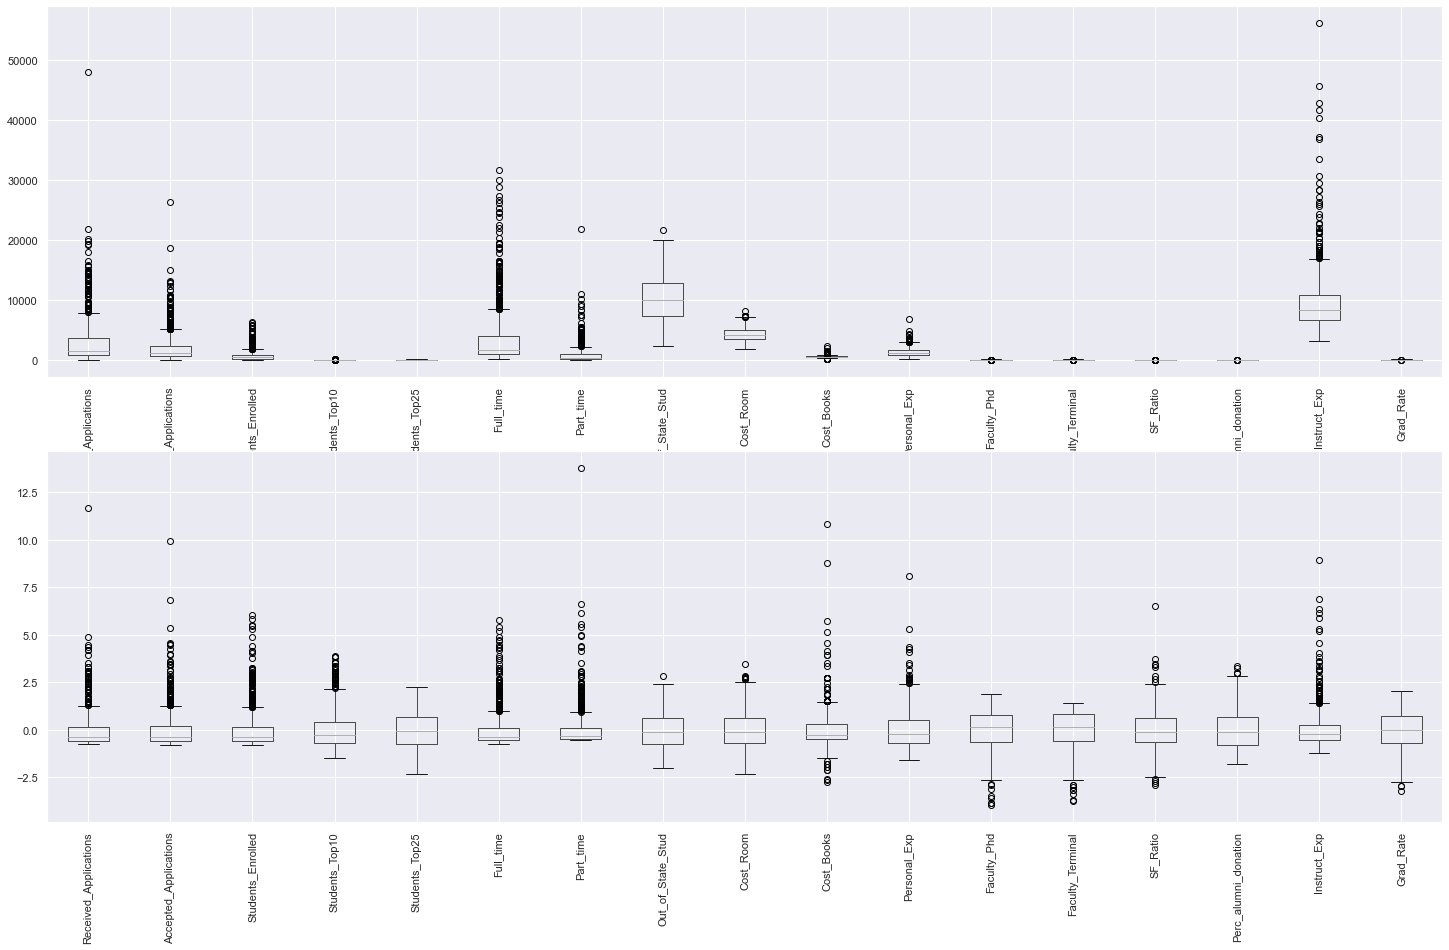

In [113]:
plt.figure(figsize=(25,15))
plt.subplot(2,1,1)
df_num.boxplot()
plt.xticks(rotation=90)
plt.subplot(2,1,2)
scaled_data.boxplot()
plt.xticks(rotation=90)
plt.show()

1. Almost all variables have outliers.
2. Students from Top 25 does not have any outliers.
3. Faculty with PhD and Faculty with Terminal degree variables are left skewed.
4. SF Ratio and Cost of books have outliers on both the sides (Right and left)
5. Rest all columns hare right skewed.
6. As no outlier treatment is done, there are no changes in the outliers. 
7. The Boxplot is scaled from -2.5 to 12.5 with 2.5 as class intervals.

###### Statistical tests to be done before PCA
**Bartletts Test of Sphericity**
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

- H0: All variables in the data are uncorrelated
- H1: At least one pair of variables in the data are correlated
If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [114]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value_kmo=calculate_bartlett_sphericity(scaled_data)
p_value_kmo

0.0

p-value is lesser than the alpha, so we reject the null hypothesis. Hence, we agree that there is atleast one pair of variables in the data which are correlated hence PCA is recommended.

**KMO Test**
The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

- Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. 
- On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [115]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_data)
kmo_model

0.8131263544189367

The measure of sampling adequacy (MSA) is larger than 0.7, hence the data is is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

**2.6 Extract the eigenvalues, and eigenvectors.**

In [116]:
eigen_values,eigen_vectors = np.linalg.eig(scaled_data_cov)
print('Eigen Values:')
df_eigen_values = round(pd.DataFrame(eigen_values).T,2)
df_eigen_values

Eigen Values:


0     1     2    3     4     5     6    7     8     9     10    11    12  \
0  5.45  4.49  1.17  1.0  0.94  0.85  0.59  0.6  0.52  0.41  0.02  0.03  0.31   

     13    14    15    16  
0  0.09  0.14  0.16  0.22

In [159]:
print('Eigen Vectors')
eigen_vectors_Df = round(pd.DataFrame(eigen_vectors).T,2)
eigen_vectors_Df

Eigen Vectors


0     1     2     3     4     5     6     7     8     9     10    11  \
0  -0.25 -0.21 -0.18 -0.35 -0.34 -0.15 -0.03 -0.29 -0.25 -0.06  0.04 -0.32   
1   0.33  0.37  0.40 -0.08 -0.04  0.42  0.31 -0.25 -0.14  0.06  0.22  0.06   
2  -0.07 -0.11 -0.09  0.04 -0.01 -0.06  0.15  0.05  0.14  0.68  0.50 -0.11   
3   0.28  0.26  0.16 -0.05 -0.12  0.10 -0.15  0.14  0.20  0.10 -0.22 -0.54   
4  -0.00 -0.05  0.06  0.40  0.42  0.05 -0.31 -0.22 -0.56  0.11  0.22 -0.15   
5  -0.02  0.01 -0.04 -0.05  0.04 -0.04 -0.21 -0.04  0.16  0.64 -0.32  0.09   
6  -0.11 -0.06  0.04 -0.16 -0.12  0.06  0.58  0.05 -0.13  0.15 -0.03 -0.08   
7   0.00 -0.00  0.04  0.11  0.08  0.05  0.12 -0.10 -0.26  0.22 -0.68 -0.02   
8  -0.08 -0.18 -0.13  0.35  0.41 -0.07  0.54 -0.01  0.26 -0.13 -0.10 -0.17   
9   0.06  0.03  0.03  0.08  0.01  0.01 -0.22  0.19  0.28 -0.09  0.14 -0.14   
10 -0.17  0.30 -0.71  0.09 -0.06  0.60 -0.03 -0.01 -0.00 -0.01 -0.00 -0.02   
11 -0.55  0.68  0.15  0.22 -0.11 -0.37  0.05 -0.11  0.03 -0.00  0.01 -0.04   
12  0.05 -0.07 -0.08 -0.02 -0.28 -0.08  0.10  0.07 -0.35  0.04 -0.03  0.05   
13 -0.15  0.19 -0.04 -0.68  0.61 -0.02 -0.03 -0.06  0.01  0.01  0.01  0.12   
14  0.14  0.06 -0.12 -0.12  0.16 -0.12  0.03 -0.06 -0.07 -0.06  0.03 -0.67   
15 -0.59 -0.29  0.45 -0.03  0.01  0.50 -0.11  0.15  0.06 -0.02 -0.03 -0.19   
16  0.01 -0.15  0.03  0.05 -0.08  0.07 -0.06 -0.83  0.38 -0.03 -0.04  0.02   

      12    13    14    15    16  
0  -0.32  0.18 -0.21 -0.32 -0.25  
1   0.05  0.25 -0.25 -0.13 -0.17  
2  -0.05 -0.28 -0.15  0.22 -0.21  
3  -0.52 -0.17  0.01  0.09  0.26  
4  -0.21  0.06  0.22 -0.07  0.11  
5   0.15  0.49 -0.04 -0.30  0.22  
6  -0.04  0.01  0.72 -0.12  0.16  
7   0.03 -0.23 -0.02  0.20 -0.53  
8  -0.25  0.28 -0.29 -0.05  0.05  
9  -0.08  0.50  0.39  0.17 -0.58  
10  0.00 -0.00  0.02  0.01  0.01  
11  0.03  0.02  0.00  0.05  0.01  
12 -0.05  0.42 -0.14  0.70  0.26  
13 -0.17  0.02  0.02  0.23  0.00  
14  0.66  0.03 -0.02  0.06  0.04  
15  0.12  0.03 -0.11  0.11  0.08  
16  0.02 -0.05  0.19  0.27  0.10

In [118]:
# Identifying the largest eigen value
print('The first principal component is:',round(eigen_values[0],2))

The first principal component is: 5.45


* Eigen Vectors : principal components = coefficients in the representation
* Eigen Values : the variances
* In the data after standardization, the original variables each had a variance of 1
* Eigen Values: PC1 5.45 ~ 5 the first principal component has picked 5 variances out of 17 variances.
* The latter values are PC2, PC3... these independent components are picking the variances that are orthogonal between each other.

In [119]:
total = sum(eigen_values)
total
# 17 features or columns

17.000000000000007

In [120]:
# explained variance
var_explained = [(i/total)*100 for i in sorted(eigen_values,reverse=True)]
print('Explained variances in percentages:')
round(pd.DataFrame(var_explained),2).T

Explained variances in percentages:


0     1    2     3     4    5     6     7     8     9     10    11  \
0  32.06  26.4  6.9  5.91  5.52  5.0  3.55  3.44  3.07  2.38  1.83  1.28   

     12    13    14   15    16  
0  0.95  0.84  0.53  0.2  0.14

In [121]:
cumulative = np.cumsum(var_explained)
cumulative

array([ 32.06258706,  58.46023681,  65.36130438,  71.26633134,
        76.78655834,  81.78180276,  85.33454753,  88.77943123,
        91.84921544,  94.23197286,  96.06555968,  97.34438677,
        98.29355372,  99.13287548,  99.66761738,  99.86425195,
       100.        ])

In [122]:
# using scikit learn PCA. It maps data to PCA -dimensions in one shot
from sklearn.decomposition import PCA

**2.5 Perform PCA and export the data of the Principal Component scores into a data frame.**

1.Kaiser’s stopping rule states that only the number of factors with eigenvalues over 1.00 should be considered in the analysis.
There are 4 components with eigen values more than 1.
2. According to Scree test we will take only first 3 components for Principal component analysis.
3. As 95% is the threshold for selecting the cumulative percent, we will choose 10 components will explains 95% approximately.
For this particular data set, to select an institution for graduation, Graduation rate, SF Ratio, Faculty quality, student quality, expenses involved are the key elements. Considering only 3 to 4 components will not suffice as they explain only 70% of variation. When more variations are compressed, the PCA works well. So, **the optimum number of components is 10.**


In [123]:
# 9 components capture 90% of the variations.
pca = PCA(n_components=9)
reduced_data1 = pca.fit_transform(scaled_data)

In [124]:
reduced_data1.transpose()

array([[-1.59346504e+00, -2.19266226e+00, -1.43023204e+00, ...,
        -7.34072793e-01,  7.92380960e+00, -4.64915192e-01],
       [ 7.64437705e-01, -5.81414120e-01, -1.09470724e+00, ...,
        -7.78216097e-02, -2.05664756e+00,  3.63862232e-01],
       [-1.07421906e-01,  2.29867011e+00, -4.34916262e-01, ...,
         9.12940911e-05,  2.07877587e+00, -1.33139320e+00],
       ...,
       [ 6.39051775e-01,  2.62106827e-01, -2.45334273e-01, ...,
        -1.31600682e+00,  8.64174950e-02,  1.30056029e+00],
       [-8.74510477e-01,  4.96032142e-02,  3.07322950e-01, ...,
        -1.38326914e-01, -5.52008873e-01,  6.36912458e-01],
       [ 9.44770391e-02,  1.11907092e+00, -1.04441177e-01, ...,
         2.08802961e-01,  8.24517718e-02,  7.26004366e-01]])

In [125]:
pca.components_

array([[ 0.24817474,  0.20695255,  0.17567199,  0.35428028,  0.34397162,
         0.15401197,  0.02598813,  0.29496446,  0.24906751,  0.06459603,
        -0.0427599 ,  0.318267  ,  0.31695926, -0.17717383,  0.20537278,
         0.31890802,  0.25382196],
       [ 0.3320515 ,  0.37251274,  0.40401994, -0.08183002, -0.0442229 ,
         0.41791719,  0.31511323, -0.24912212, -0.13732692,  0.05649159,
         0.21978703,  0.05870859,  0.04687713,  0.24632014, -0.24624836,
        -0.13110774, -0.16904906],
       [-0.06147372, -0.09962857, -0.08213641,  0.03474389, -0.02474282,
        -0.06090748,  0.13899042,  0.04744534,  0.1503731 ,  0.67804246,
         0.49810637, -0.12997671, -0.06863453, -0.29071217, -0.14690282,
         0.22734267, -0.20640575],
       [ 0.28250601,  0.26910969,  0.16266605, -0.05243562, -0.11130334,
         0.10102193, -0.15822026,  0.13319486,  0.18628853,  0.07837261,
        -0.23577968, -0.53408457, -0.51939036, -0.16376563,  0.01789079,
         0.08134364

In [126]:
df_pca = pd.DataFrame(pca.components_,columns=list(scaled_data))
print('Dataframe with PCA components:')
round(df_pca,2)

Dataframe with PCA components:


Received_Applications  Accepted_Applications  Students_Enrolled  \
0                   0.25                   0.21               0.18   
1                   0.33                   0.37               0.40   
2                  -0.06                  -0.10              -0.08   
3                   0.28                   0.27               0.16   
4                   0.00                   0.05              -0.06   
5                  -0.01                   0.01              -0.04   
6                  -0.04                  -0.01              -0.03   
7                  -0.10                  -0.06               0.06   
8                  -0.09                  -0.18              -0.13   

   Students_Top10  Students_Top25  Full_time  Part_time  Out_of_State_Stud  \
0            0.35            0.34       0.15       0.03               0.29   
1           -0.08           -0.04       0.42       0.32              -0.25   
2            0.03           -0.02      -0.06       0.14               0.05   
3           -0.05           -0.11       0.10      -0.16               0.13   
4           -0.39           -0.43      -0.04       0.30               0.22   
5           -0.05            0.03      -0.04      -0.19              -0.03   
6           -0.16           -0.12      -0.02       0.05               0.11   
7           -0.12           -0.10       0.08       0.57               0.01   
8            0.34            0.40      -0.06       0.56              -0.00   

   Cost_Room  Cost_Books  Personal_Exp  Faculty_Phd  Faculty_Terminal  \
0       0.25        0.06         -0.04         0.32              0.32   
1      -0.14        0.06          0.22         0.06              0.05   
2       0.15        0.68          0.50        -0.13             -0.07   
3       0.19        0.08         -0.24        -0.53             -0.52   
4       0.56       -0.13         -0.22         0.14              0.21   
5       0.16        0.64         -0.33         0.09              0.15   
6       0.21       -0.15          0.63        -0.00             -0.03   
7      -0.22        0.21         -0.23        -0.08             -0.01   
8       0.28       -0.13         -0.09        -0.19             -0.26   

   SF_Ratio  Perc_alumni_donation  Instruct_Exp  Grad_Rate  
0     -0.18                  0.21          0.32       0.25  
1      0.25                 -0.25         -0.13      -0.17  
2     -0.29                 -0.15          0.23      -0.21  
3     -0.16                  0.02          0.08       0.26  
4     -0.08                 -0.22          0.08      -0.11  
5      0.49                 -0.05         -0.30       0.22  
6      0.22                  0.24         -0.23       0.56  
7     -0.08                  0.68         -0.06      -0.00  
8      0.28                 -0.25         -0.05       0.04

In [127]:
# check the shape of the PCA components data frame
df_pca.shape

(9, 17)

**2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only).**

In [128]:
# first principal component
PC_1 = var_explained[0]
PC_1

32.06258706290001

In [165]:
# the vector corresponding to first principal component
copy_scaled_data = scaled_data.copy()
pca = PCA(n_components=1)
pca.fit_transform(copy_scaled_data)
df_PC = pd.DataFrame(pca.components_,columns=copy_scaled_data.columns,index=['PC1'])
Series1 = df_PC.iloc[0]
print('Explicit form of PC1 with respect to the eigen vector')
round(df_PC,2).T

Explicit form of PC1 with respect to the eigen vector


PC1
Received_Applications  0.25
Accepted_Applications  0.21
Students_Enrolled      0.18
Students_Top10         0.35
Students_Top25         0.34
Full_time              0.15
Part_time              0.03
Out_of_State_Stud      0.29
Cost_Room              0.25
Cost_Books             0.06
Personal_Exp          -0.04
Faculty_Phd            0.32
Faculty_Terminal       0.32
SF_Ratio              -0.18
Perc_alumni_donation   0.21
Instruct_Exp           0.32
Grad_Rate              0.25

In [132]:
# to get the values corresponding to the PC1 component
func2 = lambda x: x*Series1

In [133]:
PCA1_explicit =copy_scaled_data.apply(func2, axis=1)
print('Values of PC1 multiplied with the data points:')
round(PCA1_explicit.head(10),2)

Values of PC1 multiplied with the data points:


Received_Applications  Accepted_Applications  Students_Enrolled  \
0                  -0.09                  -0.07              -0.01   
1                  -0.05                  -0.01              -0.05   
2                  -0.10                  -0.08              -0.08   
3                  -0.17                  -0.14              -0.12   
4                  -0.18                  -0.16              -0.14   
5                  -0.15                  -0.13              -0.12   
6                  -0.17                  -0.14              -0.13   
7                  -0.07                  -0.03              -0.06   
8                  -0.13                  -0.10              -0.10   
9                  -0.16                  -0.13              -0.12   

   Students_Top10  Students_Top25  Full_time  Part_time  Out_of_State_Stud  \
0           -0.09           -0.07      -0.03      -0.01              -0.22   
1           -0.23           -0.47      -0.03       0.01               0.13   
2           -0.11           -0.10      -0.08      -0.01               0.06   
3            0.65            0.58      -0.10      -0.01               0.18   
4           -0.23           -0.21      -0.11       0.00              -0.21   
5            0.21            0.11      -0.10      -0.01               0.22   
6           -0.21           -0.19      -0.10      -0.01               0.21   
7            0.19            0.21      -0.07      -0.01               0.25   
8            0.05            0.13      -0.09      -0.01               0.38   
9           -0.13           -0.21      -0.09      -0.01               0.00   

   Cost_Room  Cost_Books  Personal_Exp  Faculty_Phd  Faculty_Terminal  \
0      -0.24       -0.04         -0.05        -0.05             -0.04   
1       0.48        0.08         -0.01        -0.85             -1.07   
2      -0.14       -0.06          0.01        -0.38             -0.30   
3       0.25       -0.04          0.03         0.38              0.37   
4      -0.05        0.10         -0.01         0.07             -0.17   
5      -0.23       -0.02          0.04        -0.11             -0.14   
6       0.31       -0.02         -0.01         0.34              0.29   
7       0.11       -0.04          0.03         0.32              0.44   
8       0.01       -0.10          0.05         0.12              0.09   
9      -0.22        0.04         -0.03        -0.64             -0.83   

   SF_Ratio  Perc_alumni_donation  Instruct_Exp  Grad_Rate  
0     -0.18                 -0.18         -0.16      -0.08  
1      0.08                 -0.11          0.05      -0.14  
2      0.05                  0.12         -0.06      -0.17  
3      0.29                  0.24          0.57      -0.10  
4      0.10                 -0.34          0.08      -0.75  
5      0.21                 -0.19          0.00      -0.15  
6      0.12                  0.05         -0.05      -0.04  
7      0.02                  0.24          0.11       0.11  
8      0.12                  0.00          0.12       0.22  
9      0.12                 -0.13         -0.04      -0.20

**2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?**

In [134]:
# Data frame showing the cumulative values for each components
print('Cumulative percentage of the variances explained by each component:')
cumulative_df = round(pd.DataFrame(cumulative).T,2)
cumulative_df

Cumulative percentage of the variances explained by each component:


0      1      2      3      4      5      6      7      8      9   \
0  32.06  58.46  65.36  71.27  76.79  81.78  85.33  88.78  91.85  94.23   

      10     11     12     13     14     15     16  
0  96.07  97.34  98.29  99.13  99.67  99.86  100.0

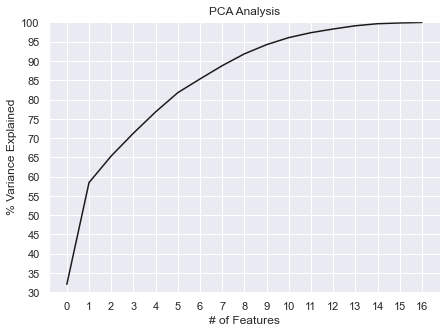

In [135]:
# plotting based on cumulative percent
plt.figure(figsize=(7,5))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.xticks(np.arange(0,18,1))
plt.yticks(np.arange(30,105,5))
plt.ylim(30,100.5)


plt.plot(cumulative,color='k')
plt.show()

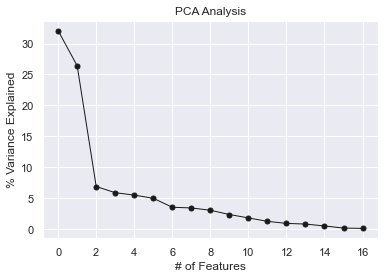

In [136]:
# plotting the explained variances in scree plot
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.plot(var_explained,color='k',marker='o',linewidth=1, markersize=5)

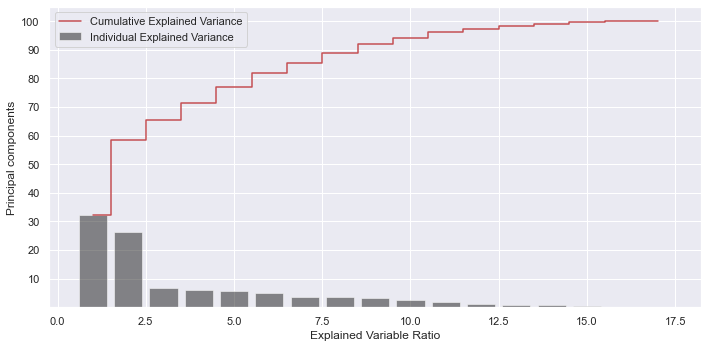

In [137]:
# plot showing the breakup of cumulative percentages
plt.figure(figsize=(10,5))
plt.bar(range(1,eigen_values.size + 1),var_explained , alpha= 0.5,align='center',color='k',label = 'Individual Explained Variance')
plt.step(range(1,eigen_values.size + 1), cumulative,where='mid',color='r',label='Cumulative Explained Variance')
plt.legend(loc = 'best')
plt.xlabel('Explained Variable Ratio')
plt.ylabel('Principal components')
plt.yticks(np.arange(10,110,10))
plt.tight_layout()

plt.show()

In [138]:
# the cumulative percentage corresponding to 9 components/ the total variance captured by 9 components.
print('The approximate amount of  variance captured by 9 components:',cumulative_df[8])

The approximate amount of  variance captured by 9 components: 0    91.85
Name: 8, dtype: float64


**2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]**

In [139]:
# analysing the the features of different colleges to find the best college to graduate using the first Principal component

In [140]:
pca = PCA(n_components=1)
data_reduced_PC1 = pca.fit_transform(copy_scaled_data)

In [141]:
# creating a new column 
df['Univ/College_Score'] = data_reduced_PC1

In [142]:
df.head()

Univ/College  Received_Applications  Accepted_Applications  \
0  Abilene Christian University                   1660                   1232   
1            Adelphi University                   2186                   1924   
2                Adrian College                   1428                   1097   
3           Agnes Scott College                    417                    349   
4     Alaska Pacific University                    193                    146   

   Students_Enrolled  Students_Top10  Students_Top25  Full_time  Part_time  \
0                721              23              52       2885        537   
1                512              16              29       2683       1227   
2                336              22              50       1036         99   
3                137              60              89        510         63   
4                 55              16              44        249        869   

   Out_of_State_Stud  Cost_Room  Cost_Books  Personal_Exp  Faculty_Phd  \
0               7440       3300         450          2200           70   
1              12280       6450         750          1500           29   
2              11250       3750         400          1165           53   
3              12960       5450         450           875           92   
4               7560       4120         800          1500           76   

   Faculty_Terminal  SF_Ratio  Perc_alumni_donation  Instruct_Exp  Grad_Rate  \
0                78      18.1                    12          7041         60   
1                30      12.2                    16         10527         56   
2                66      12.9                    30          8735         54   
3                97       7.7                    37         19016         59   
4                72      11.9                     2         10922         15   

   Univ/College_Score  
0           -1.593465  
1           -2.192662  
2           -1.430232  
3            2.857842  
4           -2.217581

In [143]:
# sorting the values of the 'Univ/College_Score' column to find the college with high score

In [144]:
Top10 = df.sort_values(by='Univ/College_Score',ascending = False).head(30)
Last10 = df.sort_values(by='Univ/College_Score',ascending = False).tail(10)

In [145]:
print('The 15 best Universities to Graduate')
Top10[['Univ/College','Univ/College_Score']].head(15)

The 15 best Universities to Graduate


Univ/College  Univ/College_Score
284               Johns Hopkins University            8.050855
775                        Yale University            7.923810
250                     Harvard University            7.697881
483               Rutgers at New Brunswick            7.302806
663             University of Pennsylvania            7.178891
174                        Duke University            7.143730
728                  Washington University            6.934614
459                   Princeton University            6.932374
158                      Dartmouth College            6.859021
354  Massachusetts Institute of Technology            6.745508
637    University of Michigan at Ann Arbor            6.680795
70                        Brown University            6.519515
424                Northwestern University            6.510970
609                  University of Chicago            6.413529
191                       Emory University            6.271274

In [146]:
# summary of top 3 Univ/Colleges
print('Description of the Top3 Colleges as per the Univ/College score')
round(Top10.iloc[0:3].describe().T,2)

Description of the Top3 Colleges as per the Univ/College score


count      mean       std      min       25%       50%  \
Received_Applications    3.0  11014.67   2708.81   8474.0   9589.50  10705.00   
Accepted_Applications    3.0   2688.00    672.06   2165.0   2309.00   2453.00   
Students_Enrolled        3.0   1278.00    349.14    911.0   1114.00   1317.00   
Students_Top10           3.0     86.67     10.41     75.0     82.50     90.00   
Students_Top25           3.0     97.67      3.21     94.0     96.50     99.00   
Full_time                3.0   5215.00   1648.00   3566.0   4391.50   5217.00   
Part_time                3.0    657.33    798.37     83.0    201.50    320.00   
Out_of_State_Stud        3.0  19041.67    709.09  18485.0  18642.50  18800.00   
Cost_Room                3.0   6553.33    169.21   6410.0   6460.00   6510.00   
Cost_Books               3.0    543.33     75.06    500.0    500.00    500.00   
Personal_Exp             3.0   1691.67    572.72   1040.0   1480.00   1920.00   
Faculty_Phd              3.0     96.33      0.58     96.0     96.00     96.00   
Faculty_Terminal         3.0     96.67      0.58     96.0     96.50     97.00   
SF_Ratio                 3.0      6.33      3.33      3.3      4.55      5.80   
Perc_alumni_donation     3.0     46.33      7.37     38.0     43.50     49.00   
Instruct_Exp             3.0  44612.67  10187.32  37219.0  38802.50  40386.00   
Grad_Rate                3.0     96.33      5.51     90.0     94.50     99.00   
Univ/College_Score       3.0      7.89      0.18      7.7      7.81      7.92   

                            75%       max  
Received_Applications  12285.00  13865.00  
Accepted_Applications   2949.50   3446.00  
Students_Enrolled       1461.50   1606.00  
Students_Top10            92.50     95.00  
Students_Top25            99.50    100.00  
Full_time               6039.50   6862.00  
Part_time                944.50   1569.00  
Out_of_State_Stud      19320.00  19840.00  
Cost_Room               6625.00   6740.00  
Cost_Books               565.00    630.00  
Personal_Exp            2017.50   2115.00  
Faculty_Phd               96.50     97.00  
Faculty_Terminal          97.00     97.00  
SF_Ratio                   7.85      9.90  
Perc_alumni_donation      50.50     52.00  
Instruct_Exp           48309.50  56233.00  
Grad_Rate                 99.50    100.00  
Univ/College_Score         7.99      8.05

In [147]:
from matplotlib.patches import Rectangle

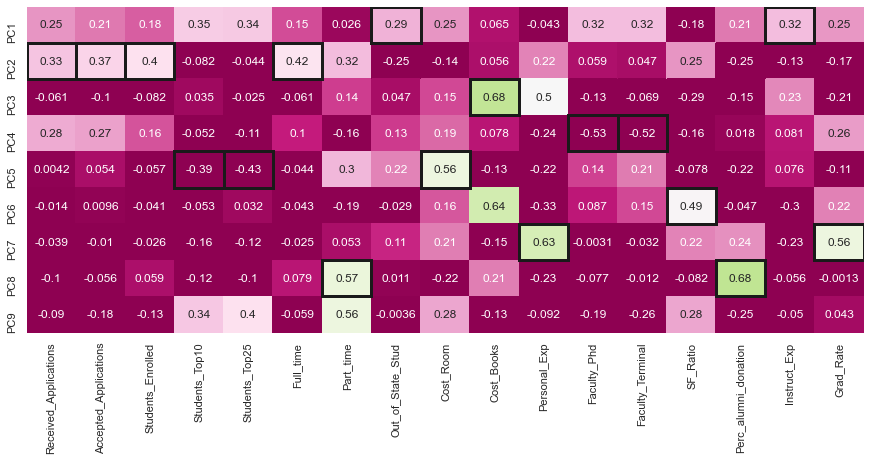

In [148]:
# heatmap showing the components and their captured variances of various features.
fig,ax = plt.subplots(figsize=(15,6), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca, annot=True, vmax=1.0, vmin=0, cmap='PiYG', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

column_max = df_pca.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca.columns):
    position = df_pca.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='k', lw=3))

- PC1: Captures most of the variances. Explains more variances in Instructional Expenses. 
- PC2: Full time
- PC3: Cost of Books
- PC4: Faculties with PhD and Terminal degree
- PC5: Cost of room
- PC6: SF Ratio
- PC7: Graduation Rate
- PC8: Alumni donation
- PC9: Top10_25

In [149]:
copy_data1 = reduced_data1.copy()

In [150]:
copy_data1 = pd.DataFrame(copy_data1,columns=['PC1_Instruct_Exp','PC2_FullTime','PC3_Cost_Books','PC4_Faculty_Phd_Terminal',
                                                 'PC5_Cost_Room','PC6_SFRatio','PC7_Grad_Rate','PC8_Alumni_Donation',
                                                 'PC9_Top10_25'])
print('New data frame created by using the 9 components')
round(copy_data1.head(),2)

New data frame created by using the 9 components


PC1_Instruct_Exp  PC2_FullTime  PC3_Cost_Books  PC4_Faculty_Phd_Terminal  \
0             -1.59          0.76           -0.11                     -0.93   
1             -2.19         -0.58            2.30                      3.59   
2             -1.43         -1.09           -0.43                      0.69   
3              2.86         -2.63            0.14                     -1.28   
4             -2.22          0.02            2.38                     -1.11   

   PC5_Cost_Room  PC6_SFRatio  PC7_Grad_Rate  PC8_Alumni_Donation  \
0          -0.74        -0.31           0.64                -0.87   
1           1.04        -0.15           0.26                 0.05   
2          -0.37        -0.95          -0.25                 0.31   
3          -0.17        -1.07          -1.26                -0.16   
4           0.69        -0.00          -2.16                -0.64   

   PC9_Top10_25  
0          0.09  
1          1.12  
2         -0.10  
3          0.37  
4         -0.17

In [151]:
# new data with reduced dimentions
copy_data1.shape

(777, 9)

In [152]:
# concatenating the the categorical and pca data
pca_draft = pd.concat([df_cat, copy_data1], axis=1)

In [153]:
round(pca_draft.head(),2)

Univ/College  PC1_Instruct_Exp  PC2_FullTime  \
0  Abilene Christian University             -1.59          0.76   
1            Adelphi University             -2.19         -0.58   
2                Adrian College             -1.43         -1.09   
3           Agnes Scott College              2.86         -2.63   
4     Alaska Pacific University             -2.22          0.02   

   PC3_Cost_Books  PC4_Faculty_Phd_Terminal  PC5_Cost_Room  PC6_SFRatio  \
0           -0.11                     -0.93          -0.74        -0.31   
1            2.30                      3.59           1.04        -0.15   
2           -0.43                      0.69          -0.37        -0.95   
3            0.14                     -1.28          -0.17        -1.07   
4            2.38                     -1.11           0.69        -0.00   

   PC7_Grad_Rate  PC8_Alumni_Donation  PC9_Top10_25  
0           0.64                -0.87          0.09  
1           0.26                 0.05          1.12  
2          -0.25                 0.31         -0.10  
3          -1.26                -0.16          0.37  
4          -2.16                -0.64         -0.17

In [154]:
round(pca_draft.describe().T,2)

count  mean   std   min   25%   50%   75%    max
PC1_Instruct_Exp          777.0   0.0  2.34 -5.67 -1.74 -0.30  1.34   8.05
PC2_FullTime              777.0   0.0  2.12 -3.58 -1.35 -0.63  0.69  12.01
PC3_Cost_Books            777.0   0.0  1.08 -2.94 -0.66 -0.10  0.49   9.03
PC4_Faculty_Phd_Terminal  777.0  -0.0  1.00 -2.95 -0.66 -0.06  0.59   5.19
PC5_Cost_Room             777.0   0.0  0.97 -2.69 -0.69 -0.05  0.62   4.24
PC6_SFRatio               777.0   0.0  0.92 -3.85 -0.52 -0.00  0.46   6.00
PC7_Grad_Rate             777.0   0.0  0.78 -2.78 -0.51  0.04  0.48   4.37
PC8_Alumni_Donation       777.0  -0.0  0.77 -1.83 -0.47 -0.04  0.42   8.43
PC9_Top10_25              777.0  -0.0  0.73 -2.60 -0.47 -0.05  0.38   5.25

##### Conclusion:
- With help of PCA we have been able to reduce 17 numeric features into 9 components which is able to explain 95% of variance in the data
- With help of reduced components, we have been able to observe some patterns. Using the first principal component we analysed the Universities with high scores and low scores. The Universities with the high scores are cross checked with the latest Rankings by US-News. 
- We are able to find the best universities of our list in the Ranking list as well.
- Unsupervised learning like clustering can further be applied on the data to segment the customers based on the components created and further analysed.
